In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [12]:
doc = """
AHMEDABAD, India, Jan 12 (Reuters) - German Chancellor Friedrich Merz floated on Monday the possibility that the European Union and India could sign a landmark free trade agreement by the end of January, a move that could reshape global trade ties as protectionism rises and U.S.-India talks remain stalled.
"""

spacy_doc = nlp(doc)

In [13]:
print(spacy_doc)
print(spacy_doc.ents)
print(spacy_doc.text)


AHMEDABAD, India, Jan 12 (Reuters) - German Chancellor Friedrich Merz floated on Monday the possibility that the European Union and India could sign a landmark free trade agreement by the end of January, a move that could reshape global trade ties as protectionism rises and U.S.-India talks remain stalled.

(India, Jan 12, Reuters, German, Friedrich Merz, Monday, the European Union, India, the end of January, U.S.-India)

AHMEDABAD, India, Jan 12 (Reuters) - German Chancellor Friedrich Merz floated on Monday the possibility that the European Union and India could sign a landmark free trade agreement by the end of January, a move that could reshape global trade ties as protectionism rises and U.S.-India talks remain stalled.



In [15]:
for token in spacy_doc:
    print(f'{token.text:{15}} {token.ent_iob_:{10}} {token.ent_type_:{10}}')


               O                    
AHMEDABAD       O                    
,               O                    
India           B          GPE       
,               O                    
Jan             B          DATE      
12              I          DATE      
(               O                    
Reuters         B          ORG       
)               O                    
-               O                    
German          B          NORP      
Chancellor      O                    
Friedrich       B          PERSON    
Merz            I          PERSON    
floated         O                    
on              O                    
Monday          B          DATE      
the             O                    
possibility     O                    
that            O                    
the             B          ORG       
European        I          ORG       
Union           I          ORG       
and             O                    
India           B          GPE       
could       

In [21]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wc = WordCloud(
    width = 500,
    height = 500,
    background_color = 'black',
    min_font_size = 10
)

wc.generate(spacy_doc.text)

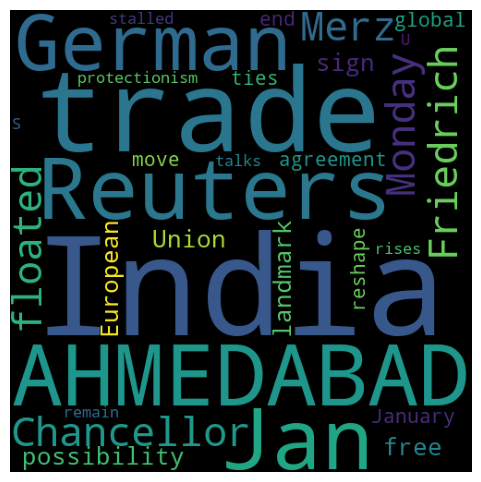

In [22]:
plt.figure(figsize = (6, 6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [26]:
import csv
import re

input_file = "../Datasets/NLP/next_word_predictor.txt"
output_file = "../Datasets/NLP/next_word_predictor.csv"

with open(input_file, "r", encoding="utf-8") as f:
    text = f.read()

# Split into sentences (basic but effective)
sentences = re.split(r'(?<=[.!?])\s+', text)

# Clean empty lines
sentences = [s.strip() for s in sentences if s.strip()]

with open(output_file, "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["sentence"])  # header

    for sentence in sentences:
        writer.writerow([sentence])

print("CSV file created successfully!")


CSV file created successfully!
